# EA FIFA 19 Players Stats
## by Faress Eissa

## Preliminary Wrangling

> Detailed attributes for every player registered in the latest edition of FIFA 19 database. Scraping code at GitHub repo: https://github.com/amanthedorkknight/fifa18-all-player-statistics/tree/master/2019

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
# Load dataset
data= pd.read_csv('data.csv')
data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [6]:
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [7]:
## Transfer Height column into a single value in cm
Height= data.Height.str.split("'", expand= True)
foot= Height[0].astype('float')
inch= Height[1].astype('float') / 12
data['Height'] = round((foot + inch) * 30.48)

In [8]:
## transfer Weight column into a single value in Kg
data['Weight']= (data.Weight.str.split('l', expand= True)[0]).astype('float')
data['Weight']= round(data.Weight.apply(lambda x: x * 0.453592))


In [9]:
# filling the missing value for the continous variables for proper data visualization
numeric= ['ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
          'LongPassing','BallControl','HeadingAccuracy','Finishing'
          ,'Crossing','Weight','Height','Skill Moves','Weak Foot',
          'Acceleration','SprintSpeed' ,'Agility','Reactions',
          'Balance','ShotPower','Jumping','Stamina' ,'Strength',
          'LongShots' ,'Aggression','Interceptions' ,'Positioning',
          'Vision','Penalties' ,'Composure','Marking' ,
          'StandingTackle','SlidingTackle' ,'GKDiving' ,
          'GKHandling' ,'GKKicking' ,'GKPositioning' ,'GKReflexes']

for c in numeric:
    data[c].fillna(data[c].median(), inplace = True)

# filling other missing values with default entry
data['Body Type'].fillna('Normal', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)

In [10]:
data.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                            0
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                          0
Weight                          0
LS                           2085
ST            

In [11]:
# create several columns inclusive to the mean of corresponding attributes

data['Defending'] = round(data[['Marking', 'StandingTackle', 
                               'SlidingTackle','Interceptions','HeadingAccuracy']].mean(axis= 1))
data['Dribble'] = round(data[[ 'Dribbling', 'Acceleration', 
                               'BallControl']].mean(axis= 1))
data['Mental'] = round(data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean(axis=1))
data['Passing'] = round(data[['Crossing', 'ShortPassing',
                              'LongPassing','Curve']].mean(axis= 1))
data['Mobility'] = round(data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean(axis= 1))
data['Power'] = round(data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean(axis= 1))
data['Shooting'] = round(data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties','Curve','HeadingAccuracy']].mean(axis= 1))

data['GK']= round(data[['GKDiving', 'GKHandling', 'GKKicking', 
                               'GKPositioning','GKReflexes']].mean(axis= 1))

In [12]:
# create a new df with selected columns
df= data[['ID', 'Name', 'Age','Nationality','Overall','Potential',
         'Club','Value','Wage','Special','Defending','Dribble',
         'Mental','Passing','Mobility','Power','Shooting','GK',
         'Preferred Foot','International Reputation','Weak Foot',
          'Skill Moves','Work Rate','Position' ,'Jersey Number',
          'Joined','Contract Valid Until','Height','Weight' ]].copy()

In [13]:
df

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Defending,Dribble,Mental,Passing,Mobility,Power,Shooting,GK,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Joined,Contract Valid Until,Height,Weight
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,36.0,95.0,71.0,88.0,91.0,74.0,86.0,11.0,Left,5.0,4.0,4.0,Medium/ Medium,RF,10.0,"Jul 1, 2004",2021,170.0,72.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,40.0,90.0,73.0,81.0,91.0,83.0,88.0,12.0,Right,5.0,4.0,5.0,High/ Low,ST,7.0,"Jul 10, 2018",2022,188.0,83.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,36.0,95.0,72.0,82.0,94.0,69.0,81.0,12.0,Right,5.0,5.0,5.0,High/ Medium,LW,10.0,"Aug 3, 2017",2022,175.0,68.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,20.0,39.0,43.0,35.0,66.0,54.0,21.0,89.0,Right,4.0,3.0,1.0,Medium/ Medium,GK,1.0,"Jul 1, 2011",2020,193.0,76.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,59.0,85.0,81.0,90.0,81.0,76.0,81.0,11.0,Right,4.0,5.0,4.0,High/ High,RCM,7.0,"Aug 30, 2015",2023,180.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,€1K,1307,44.0,46.0,46.0,40.0,55.0,54.0,36.0,9.0,Right,1.0,2.0,2.0,Medium/ Medium,CM,22.0,"May 3, 2017",2019,175.0,61.0
18203,243165,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,€1K,1098,25.0,40.0,37.0,31.0,40.0,52.0,40.0,9.0,Right,1.0,2.0,2.0,Medium/ Medium,ST,21.0,"Mar 19, 2018",2020,190.0,77.0
18204,241638,B. Worman,16,England,47,67,Cambridge United,€60K,€1K,1189,23.0,53.0,36.0,32.0,59.0,51.0,42.0,8.0,Right,1.0,3.0,2.0,Medium/ Medium,ST,33.0,"Jul 1, 2017",2021,173.0,67.0
18205,246268,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,€1K,1228,27.0,55.0,38.0,38.0,48.0,50.0,43.0,10.0,Right,1.0,3.0,2.0,Medium/ Medium,RW,34.0,"Apr 24, 2018",2019,178.0,70.0


The next function is taken from:
https://www.kaggle.com/nitindatta/fifa-in-depth-analysis-with-linear-regression

In [14]:
#Cleaning some of values so that we can interpret them 
def value_to_int(df_value):
    try:
        value = float(df_value[1:-1])
        suffix = df_value[-1:]

        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value * 1000
    except ValueError:
        value = 0
    return value

df['Value'] = df['Value'].apply(value_to_int)
df['Wage'] = df['Wage'].apply(value_to_int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 29 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        18207 non-null object
Value                       18207 non-null float64
Wage                        18207 non-null float64
Special                     18207 non-null int64
Defending                   18207 non-null float64
Dribble                     18207 non-null float64
Mental                      18207 non-null float64
Passing                     18207 non-null float64
Mobility                    18207 non-null float64
Power                       18207 non-null float64
Shooting                    18207 non-null float64
GK                          18207 non

### What is the structure of your dataset?

> This dataset consists of 18207 entries of different player and 89 columns including players' name, nationality, club and other attributes 

### What is/are the main feature(s) of interest in your dataset?
 
> The main features of interest are Overall , Value and Wage.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like Club, Nationality, Age, Position are the most helpful features to identify which players have higher Overall , Value and Wage scores.
> All features either main or secondary have some very interesting relationships between them. 

## Univariate Exploration


In [16]:
# set base color to be used
base_clr= sns.color_palette('deep')[0]

In [17]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,Defending,Dribble,Mental,Passing,Mobility,Power,Shooting,GK,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18147.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1597.809908,47.945186,59.465206,52.922173,52.086945,63.677047,64.405394,47.742242,16.453672,1.112924,2.947438,2.360356,19.546096,181.176800,75.288241
std,29965.244204,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,272.586016,18.419984,15.656061,12.475472,15.345373,11.175910,8.680642,15.601527,16.982661,0.393554,0.659591,0.755394,15.947765,6.683331,7.066193
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,8.000000,10.000000,11.000000,9.000000,24.000000,25.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,155.000000,50.000000
25%,200315.500000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,33.000000,54.000000,47.000000,44.000000,58.000000,60.000000,39.000000,10.000000,1.000000,3.000000,2.000000,8.000000,175.000000,70.000000
50%,221759.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,52.000000,64.000000,55.000000,55.000000,66.000000,66.000000,50.000000,11.000000,1.000000,3.000000,2.000000,17.000000,180.000000,75.000000
75%,236529.500000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1787.000000,63.000000,70.000000,62.000000,63.000000,72.000000,70.000000,59.000000,12.000000,1.000000,3.000000,3.000000,26.000000,185.000000,80.000000
max,246620.000000,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,90.000000,95.000000,85.000000,90.000000,94.000000,87.000000,88.000000,89.000000,5.000000,5.000000,5.000000,99.000000,206.000000,110.000000


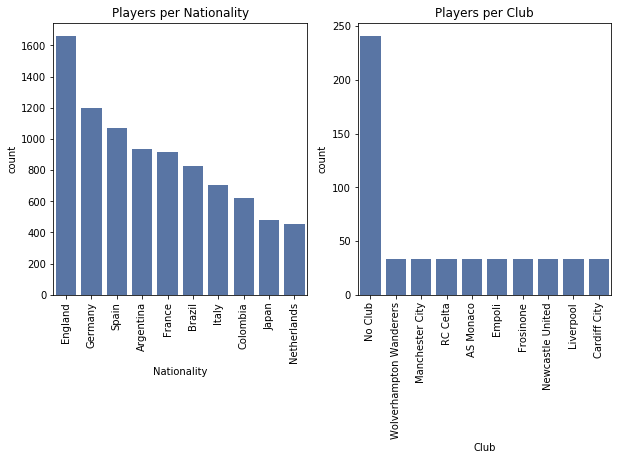

In [18]:
# Use countplot to plot top ten Nationality and club
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)
sns.countplot(df['Nationality'],order= (df['Nationality'].value_counts().iloc[:10].index),
              color= base_clr,)
plt.xticks(rotation= 90);
plt.title('Players per Nationality');

plt.subplot(1, 2, 2)
sns.countplot(df['Club'],order= (df['Club'].value_counts().iloc[:10].index),
              color= base_clr);
plt.xticks(rotation= 90);
plt.title('Players per Club');


### The two above graphs show the distribution of players between clubs and countries.
#### For countries, we see that most of players' nationalities come from top 6 European leagues which are (England, Spain, Italy, Germany, France and Netherlands) with England being the top producer of football players.
#### On the other hand for clubs, We see that around 250 players are currently not associated with any club, and the rest of the graph is just a tie between the remaining top ten clubs with most players (33) which is the maximum number of players a club can sign.

In [19]:
## Combine Position Values into 4 main categories
df.Position.replace(['ST','RF','LW','LF','LS','RW',
                        'RS', 'CF' ], 'FR', inplace= True)
df.Position.replace(['RCB','LCB','LB','CB','RB','RWB'
                        , 'LWB' ], 'DF', inplace= True)
df.Position.replace(['LCM', 'LDM','CAM','CDM','RM','LAM','RDM', 'LM','CM',
                       'RCM', 'RAM'], 'MD', inplace= True)
df['Position']= df['Position'].astype('category')

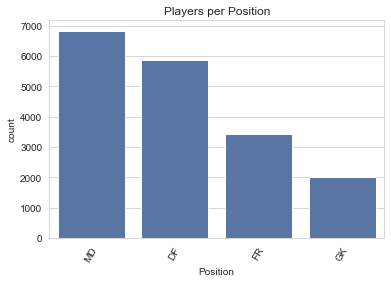

In [20]:
# Countplot for position
sns.set_style('whitegrid')
sns.countplot(df['Position'],order= (df['Position'].value_counts().index),
                                     color= base_clr);
plt.xticks(rotation= 60);
plt.title('Players per Position');


### The above graph shows the distribution of players among different positions
#### Being a Midfielder is the most common position between players, as Midfield players take so many versatile roles compared to other positions, so it is needed the most.
#### Naturally GK is the least common position as teams can only call one GK on the pitch and there is usually only two GKs called by teams each match.

In [21]:
# Change Value and Wage min value for the sake of using log_trans
df.Value.replace(0,1,inplace=True)

df.Wage.replace(0,1,inplace=True)

In [22]:
# a function to transfer a value to its log
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
df['log_Value'] = df['Value'].apply(log_trans)
df['log_Wage'] = df['Wage'].apply(log_trans)

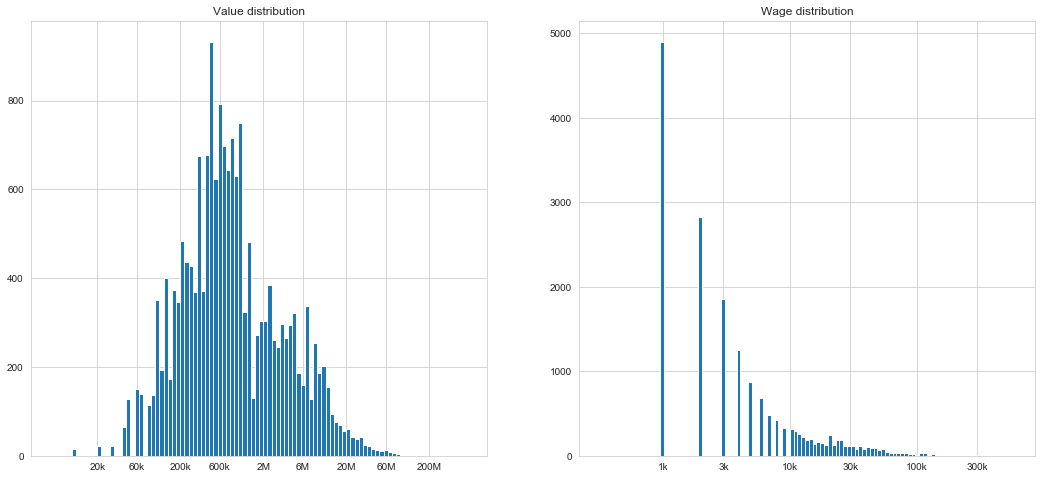

In [23]:
## Use log Value and Wage columns to perform a hist, as original values have a very long tail and highly skewed
plt.figure(figsize = [18, 8])

plt.subplot(1, 2, 1)
bins= np.arange(2.5, df.log_Value.max() + 0.05, 0.05)
ticks= log_trans(np.array([2e4,6e4, 2e5,6e5,2e6,6e6,2e7, 6e7,2e8]))
labels= ['20k','60k','200k','600k','2M','6M','20M','60M','200M']
plt.hist(data= df, x= 'log_Value',bins= bins);
plt.xlim([3.5,9])
plt.xticks(ticks, labels);
plt.title('Value distribution')


plt.subplot(1, 2, 2)
ticks= log_trans(np.array([1000, 3000, 10000, 30000, 100000, 300000]))
labels= ['1k', '3k', '10k', '30k', '100k', '300k']
bins= np.arange(2.5, df.log_Wage.max() + 0.03, 0.03)
plt.hist(data= df, x= 'log_Wage', bins= bins);
plt.xticks(ticks, labels);
plt.title('Wage distribution');


### The above two graphs shows the distribution of players' Values and Wages.
### Distribution of the original values returns  highly skewed long tailed graphs with most values on the low end. So I use the log values for the graphs.
#### Distribution of log Values is normal with most values between 200k and  2M with a drop and a jump right before the 2M mark.
#### Distribution of log Wages is right skewed with spikes on the left side of the graph and a decreasing tail on the right.

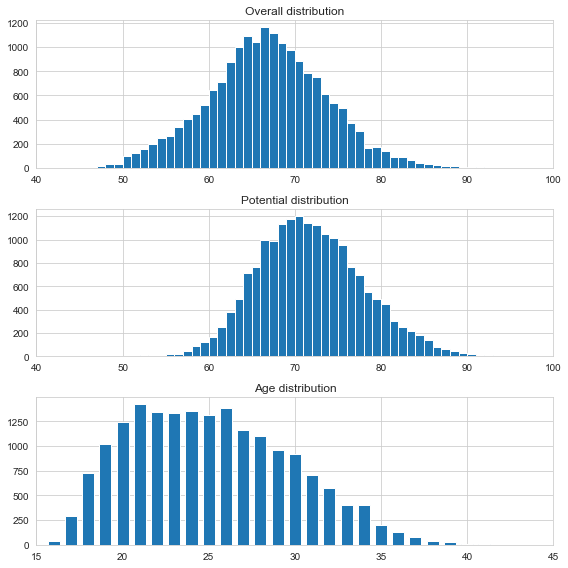

In [24]:
plt.figure(figsize=(8, 8))

plt.subplot(3,1,1)
bins= np.arange(0, df.Overall.max()+ 1, 1)
plt.hist(data= df, x= 'Overall', bins= bins);
plt.xlim([40,100])
plt.title('Overall distribution');

plt.subplot(3,1,2)
bins= np.arange(0, df.Potential.max()+ 1, 1)
plt.hist(data= df, x= 'Potential', bins= bins);
plt.xlim([40,100])
plt.title('Potential distribution');

plt.subplot(3,1,3)
bins= np.arange(df.Age.min() -0.5, df.Age.max()+ 0.5, 1)
plt.hist(data= df, x= 'Age', bins= bins, rwidth = 0.7);
plt.xlim([15,45])
plt.title('Age distribution');
plt.tight_layout()

### The above three graphs shows the players' distribution when it comes to Overall, Potential and Age.
#### The three graphs are normally distributed, with Potential shifted slightly to the right (Peak at 65) compared to Overall (peak at 70) and Age is mostly between 20 and 30.
 

> There are a variety of relationships that I plan to investigate such as:
- Club / Country VS Potential/ Overall / Age / Wage
- Value / Wage VS Overall / Potential
- Age VS Overall / Potential 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of the original values for (Value & Wage) returns  highly skewed long tailed graphs with most values on the low end. So I use log_trans function to transform the values into their log values, and I adjust the ticks to represent the real values for easier communication.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The dataset has alot of players' attributes which I grouped to 8 columns only for easier exploration
> Wage and Value columns types is 'str' and contains different units so I cleaned them to a constant unit as 'float' to be able to perform my analysis 

## Bivariate Exploration



In [25]:
## list top 10 clubs according to Sum of Value of team palyers
top_clubs= df.groupby(['Club']).sum()['Value'].sort_values(ascending= False).head(10).index
clbs = df[df.Club.isin(top_clubs)]

''

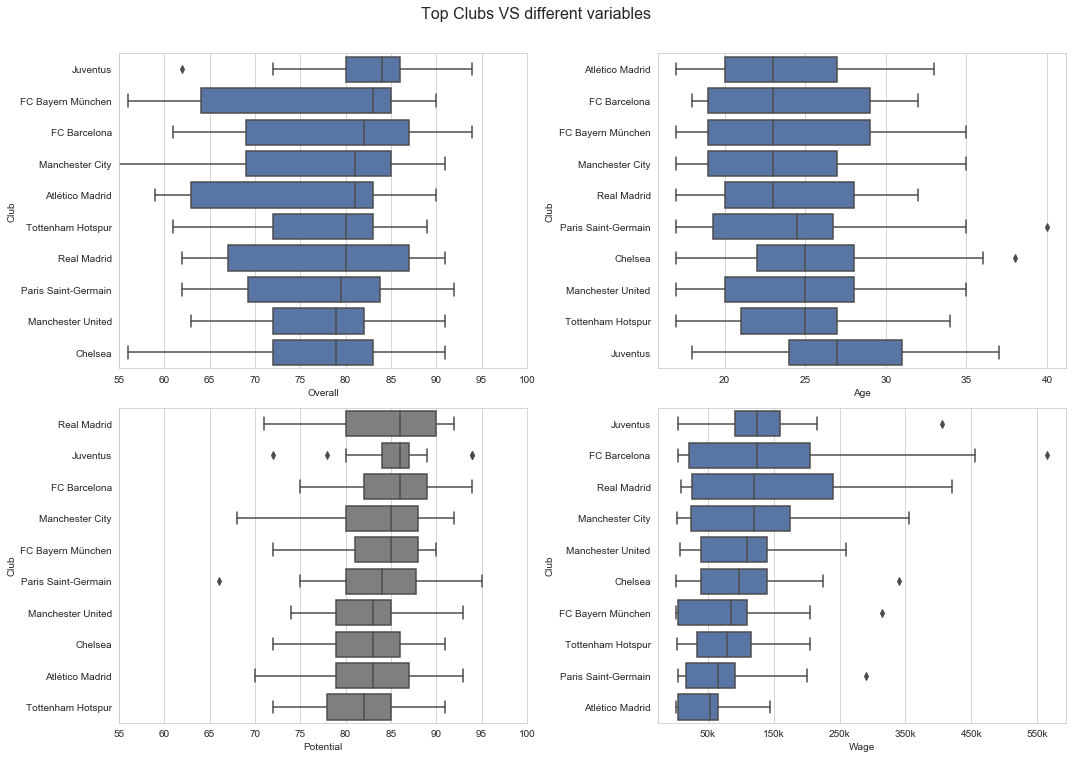

In [26]:
fig, axes = plt.subplots(2, 2,figsize=(15,10)) 
fig.suptitle('Top Clubs VS different variables', fontsize=16,y= 1.05 )
axes = axes.flatten() 
plt.sca(axes[0])
sns.boxplot(clbs.Overall, clbs.Club, color= base_clr
            , order= clbs.groupby(['Club']).median()['Overall'].sort_values(ascending= False).index);
plt.xlim(55,100);

plt.sca(axes[2])
sns.boxplot(clbs.Potential, clbs.Club, color= sns.color_palette()[7],
            order= clbs.groupby(['Club']).median()['Potential'].sort_values(ascending= False).index);
plt.xlim(55,100);

plt.sca(axes[1])
sns.boxplot(clbs.Age, clbs.Club, color= base_clr,order= clbs.groupby(['Club']).median()['Age'].sort_values().index)
;

plt.sca(axes[3])
sns.boxplot(clbs.Wage, clbs.Club, color= base_clr,order= clbs.groupby(['Club']).median()['Wage'].sort_values(ascending= False).index)
ticks=[5e4, 15e4, 25e4, 35e4, 45e4, 55e4]
labels= ['50k', '150k', '250k', '350k', '450k', '550k']
plt.xticks(ticks, labels)

plt.tight_layout()
;

### The above graphs shows the relationships between Potential, Overall ,  Age and Wage VS top clubs.
### Top 10 clubs are defined by the sum of value of their players.
#### We observe that when speaking about Potential in comparison to  Overall  , all teams seem to improve with players' scores are spread out over smaller range.
#### Juventus is an interesting case, the team's Overall, Potential and Wage values are distributed over the smallest range, which indicates that the club is very specific regarding choosing its players, and is trying to maintain equal Wage for its players, but it has the highest age range which means that the current team's Overall is going to decline faster over time.
#### We observe some interesting changes in terms of teams order, as Real Madrid jumps to top place according to potential, compared to holding seventh place according to Overall.
#### As a general rule by taking the third graph into account, most of the younger teams jump in order when transitioning from viewing Overall to Potential.
#### In the fourth graph, 50% of top clubs' players earn 50K or more, with most players sit between the 50K and 150K marks.
#### Half the teams have an outlier on the higher side, that is the player who is considered the club's star.

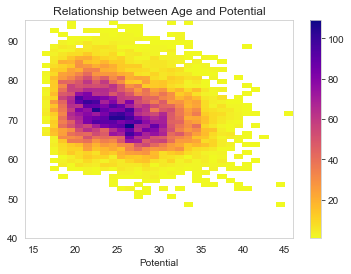

In [27]:
# Heatmap to show the real relationship, as hist will not work due to high number of points
bins_y= np.arange(40, 95+1, 1)
bins_x= np.arange(14, 47, 1)
h2d = plt.hist2d(data= df, x= 'Age', y= 'Potential', cmin= .5,
                 cmap= 'plasma_r', bins= [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.xlabel('Potential')
plt.title('Relationship between Age and Potential');


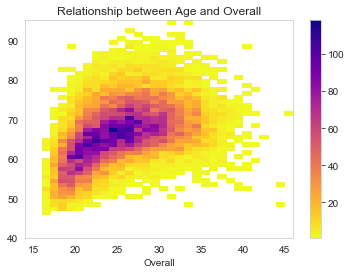

In [28]:
# Heatmap to show the real relationship, as hist will not work due to high number of points
bins_y= np.arange(40, 95+1, 1)
bins_x= np.arange(14, 47, 1)
h2d = plt.hist2d(data= df, x= 'Age', y= 'Overall', cmin= .5,
                 cmap= 'plasma_r', bins= [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Age')
plt.xlabel('Overall')
plt.title('Relationship between Age and Overall');

### The above graphs show the relationship between Potential and Overall VS Age
#### We can see that the relationship between Potential VS Age is Positive while Overall VS age is Negative, which further supports the observation in the previous set of graphs where younger teams scored better than older teams in terms of Potential.

In [29]:
# Create a dataframe with only top 10 countries based on value counts
top_counties= df.groupby(['Nationality']).count().sort_values(by=['ID'], ascending= False).head(10).index
cntrs = df[df.Nationality.isin(top_counties)].copy()

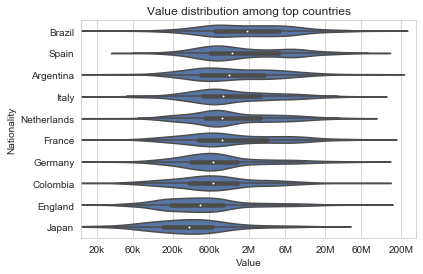

In [30]:
sns.violinplot(cntrs.log_Value, cntrs.Nationality, color= base_clr,order= cntrs.groupby(['Nationality']).median()['Value'].sort_values(ascending = False).index)
ticks= log_trans(np.array([2e4,6e4, 2e5,6e5,2e6,6e6,2e7, 6e7,2e8]))
labels= ['20k','60k','200k','600k','2M','6M','20M','60M','200M']
plt.xticks(ticks, labels)
plt.xlim(4.1,8.5)
plt.xlabel('Value');
plt.title('Value distribution among top countries');

### The above graph show the relationship between Countries VS Value
#### Although England has the most number of players, they are poorly Valued as each European and Latin American country has better players' Value scores than its Players.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> One of the most important observations is that quality overcomes quantity as countries with the most valued players don't necessarily need to produce alot of players to achieve that.



## Multivariate Exploration


In [31]:
stats= ['Defending','Dribble','Mental','Passing','Mobility',
        'Power','Shooting','GK']

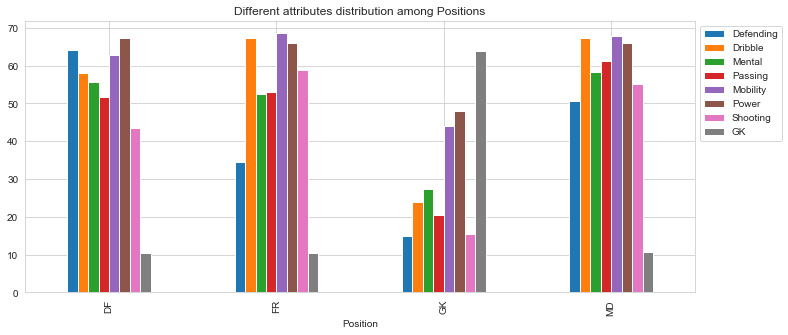

In [32]:
# create a dataframe including only Position and various players' attributes for easier plotting
df_stats= df.groupby(['Position']).mean()[stats]


df_stats.plot(kind= 'bar', figsize= (12,5));
plt.legend(bbox_to_anchor=(1, 1));
plt.title('Different attributes distribution among Positions');

### The above graph shows the distribution of various players' stats VS Position
#### One observation is that two of the most important attributes for a player in any position is Power and Mobility
#### Another observation is that Midfield players tend to be the most well rounded of all positions , with each other position being special in a specific attribute

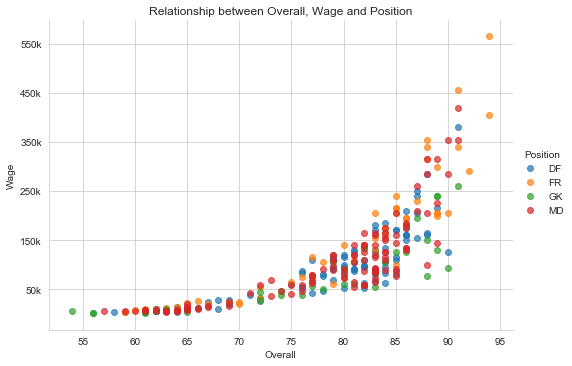

In [33]:


ticks= log_trans(np.array([2e4,6e4, 2e5,6e5,2e6,6e6,2e7, 6e7,2e8]))
labels= ['20k','60k','200k','600k','2M','6M','20M','60M','200M']
g= sns.FacetGrid(data= clbs, hue= 'Position', height=5, aspect=1.5);
g.map(plt.scatter, 'Overall', 'Wage', alpha= 0.7);
ticks=[5e4, 15e4, 25e4, 35e4, 45e4, 55e4]
labels= ['50k', '150k', '250k', '350k', '450k', '550k']
plt.yticks(ticks, labels)
g.add_legend();
plt.title('Relationship between Overall, Wage and Position');


### The above graph shows the relationship between Overall VS Wage, with Position added as a third element
#### We notice that Overall VS Wage have a positive exponential relationship, as higher rated players tend to get paid far more than lower rated ones
#### Another observation that all players who get paid more than 250K except one, are either midfielders or forwards.

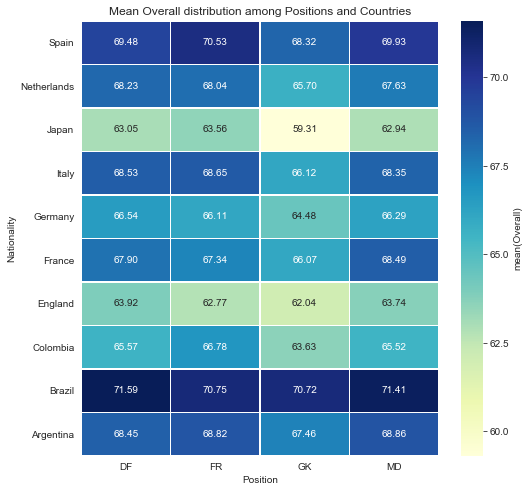

In [35]:
plt.figure(figsize=(8,8))
cat_means = cntrs.groupby(['Nationality', 'Position']).mean()['Overall']
cat_means = cat_means.reset_index(name = 'Overall_avg')
cat_means = cat_means.pivot(index = 'Nationality', columns = 'Position',
                            values = 'Overall_avg')
g= sns.heatmap(cat_means, annot = True, fmt = '.2f',cmap= 'YlGnBu'
           ,linewidths=.5, cbar_kws = {'label' : 'mean(Overall)'});
g.set(ylim= (0,10));
plt.title('Mean Overall distribution among Positions and Countries');

### The above graph the average Overall per position and country
#### The graph explains why Brazilian players are the most valued as they top the average Potential for each position, with Spain and Argentina coming in second and third place respectively.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When looking at the relationship between Overall and Wage, and adding Position to the mix, I was able to identify which types of players tend to get paid more
> It is intuitive that players with higher Overall are paid more, but the gap in Wage between high Overall rated and low Overall rated players is very surprising
### Were there any interesting or surprising interactions between features?

> It is intuitive that players with higher Overall are paid more, but the gap in Wage between high Overall rated and low Overall rated players is very surprising
> It is also interesting that England - which has the most players - has the second worst Overall averages over all positions.